* decomposition of sulfuric acid: T >= 700C
The sulfuric acid vapors are decomposed in two steps:

H$_2$SO$_4$ $\rightarrow$ SO$_3$ + H$_2$O (T > 450C)

SO$_3$ $\rightarrow$ SO$_2$ + $\frac{1}{2}$O$_2$ (T > 800C)

(The introduction says T>700, and now it says 800C...)

At 1 bar, the production of sulfur dioxide decreases at T<800C. 50% at 700C, and no sulfur dioxide at 650C.

* Bunsen reaction: (exothermic reaction) T~120C

I$_2$ + SO$_2$ + 2H$_2$O $\rightarrow$ H$_2$SO$_4$ + 2HI

* decomposition of hydrogen iodide: T >= 300C

2HI $\rightarrow$ I$_2$ + H$_2$

Hydrogen is produced at P = 4MPa.

Production rate = 75 L/min.

Production rate for a 50MWth(estimate): 12000 kg/day.

https://art.inl.gov/NGNP/Subcontractors%20Documents/General%20Atomics/Sulfur%20Iodine%20Process%20Summary%20for%20the%20Hydrogen%20Technology%20Down-Selection.pdf

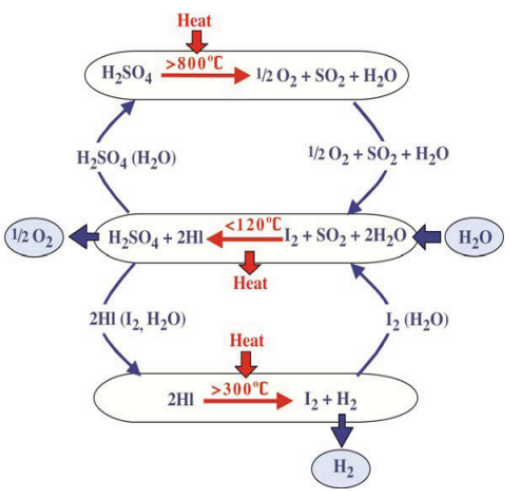

In [7]:
from IPython.display import Image
Image(filename='figures/sulfur1.png')

HYSYS simulator by Aspen Technologies. Most efficient temperature for sulfuric acid decomposition 650C, with a thermal efficiency of 75.11%. The simulation doesn't consider heat loss in the process. Bilgen's flowsheet gives a thermal efficiency of  77%.

Sulfuric acid decomposition:
2H$_2$SO$_4$ = 2H$_2$O + 2SO$_2$, $\Delta$H = 186 kJ/mol, T=600-900C

Hydriodic acid decomposition reaction:
2HI = H$_2$ + I$_2$, $\Delta$H = 12 kJ/mol

https://core.ac.uk/download/pdf/37987793.pdf 

Sulfuric acid decomposition:
* Optimun temperature at 925C
* reaction enthalpy: 278.643kJ/mol

This is not consistent with the previous numbers. Let's look for other sources.

http://ethesis.nitrkl.ac.in/5368/1/109CH0524.pdf

278.64 kJ/mol to produce the SO2, and the total thermal energy supplied was determined as 366.747 kJ/mol SO2.

Okay, these numbers match the latter source.

I should get the mole fraction for all the molecules, relative to 1H2 mole.

https://www.sciencedirect.com/science/article/pii/019689049400036Y



https://web.mit.edu/yildizgroup/LEI/assets/pdfs/bilge_ijhe_2006.pdf

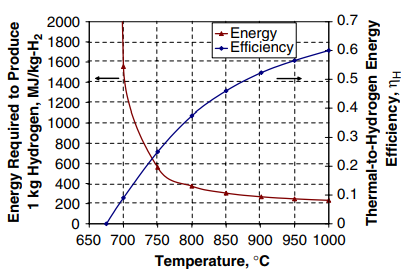

In [8]:
from IPython.display import Image
Image(filename='figures/si-energy.png')

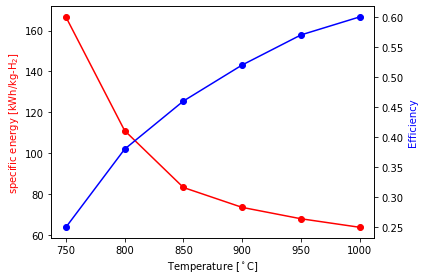

In [1]:
import numpy as np
import matplotlib.pyplot as plt

temp = [750, 800, 850, 900, 950, 1000]
sel = [600, 400, 300, 265, 245, 230]  # MJ/kg-H2
se = 1e3/3600 * np.array(sel)  # kWh/kg-H2
ef = [0.25, 0.38, 0.46, 0.52, 0.57, 0.6]

fig, ax1 = plt.subplots()
ax1.plot(temp, se, color='red', marker="o")
ax1.set_xlabel("Temperature [$^\circ$C]")
ax1.set_ylabel("specific energy [kWh/kg-H$_2$]", color="red")
ax2 = ax1.twinx()
ax2.plot(temp, ef, color='blue', marker="o")
ax2.set_ylabel('Efficiency', color='blue')
fig.tight_layout()
plt.show()

In [ ]:
pr = 4200  # moles/sec
Mh = 1.008
sev = 2400e3/(pr*(2*Mh/1e3)*3600*np.array(ef)/0.5)

plt.plot(temp, sev, marker="o")
plt.ylabel("specific energy [kWh/kg-H$_2$]")
plt.xlabel("Temperature [$^\circ$C]")

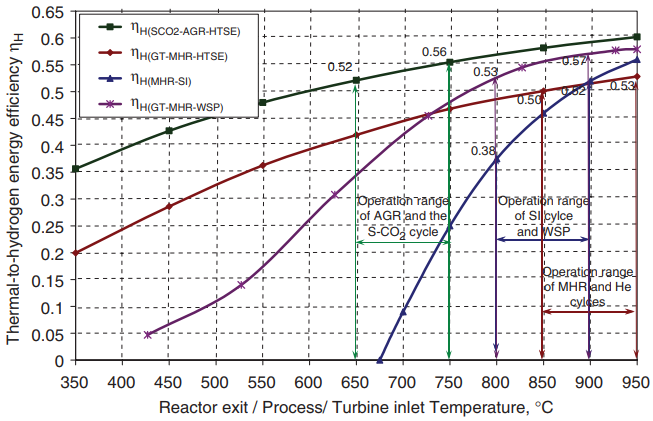

In [10]:
from IPython.display import Image
Image(filename='figures/si-comparison.png')

2400 MWth: 800 tonnes-H$_2$/day

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.511.9997&rep=rep1&type=pdf

T = 827C, $\eta$ = 0.42, P = 2400 MW$_{th}$, 4200 moles/s

https://www.osti.gov/servlets/purl/814014

In [11]:
pr = 4200  # moles/sec
Mh = 1.008
pr *= 0.42/0.5*(2*Mh/1e3)*3600
print("production rate: ", pr, "kg-H2/h")
se = 2400e3/pr
print("specific power: ", se, "kWh/kg-H2")

production rate:  25604.8128 kg-H2/h
specific power:  93.73237831287717 kWh/kg-H2


Text(0.5, 0, 'Temperature [$^\\circ$C]')

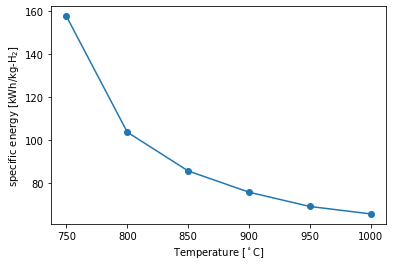

In [12]:
pr = 4200  # moles/sec
Mh = 1.008
sev = 2400e3/(pr*(2*Mh/1e3)*3600*np.array(ef)/0.5)

plt.plot(temp, sev, marker="o")
plt.ylabel("specific energy [kWh/kg-H$_2$]")
plt.xlabel("Temperature [$^\circ$C]")

Those numbers are consistent with Table 4-1 of the same report.
50 MW$_{th}$, 40% efficiency, 12000 kg/day.
600 MW$_{th}$, 42% efficiency, 150000 kg/day.
2400 MW$_{th}$, 52% efficiency, 760000 kg/day.

For 42%, the specific energy is 93.73 kWh/kg-H$_2$.
This is equivalent to 680.25 kJ/mol-H2, and this number by 0.42 is 285 kJ/mol. Which is the higher heating value (HHV) of H$_2$ 142 MJ/kg-H$_2$ = 284 kJ/mol. The HHV of a fuel is defined as the amount of heat released by a specified quantity (initially at 25°C) once it is combusted and the products have returned to a temperature of 25°C, which takes into account the latent heat of vaporization of water in the combustion products. This is also the amount of energy produced in a fuel cell. 

In [13]:
93.73*3600*2.016e-3*0.42

285.70703616000003

Steam Temperature =  [760. 855.]


Text(0.5, 0, 'Power [MW$_{th}$]')

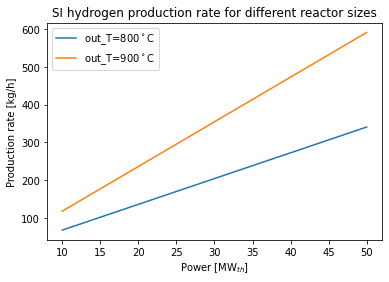

In [28]:
outT = [800, 900]  # Reactor outlet temperature
T = 0.95*np.array(outT)  # We consider that the steam temperature is 95% of the reactor outlet temperature
print("Steam Temperature = ", T)

Pth = np.interp(T, temp, sev)
# print(Pth)

power = [10, 20, 30, 40, 50]  #thermal  
# [MW]*1e3kW/MW/[kWh/kg-H2] = kg-H2/h
prate1 = [(P*1e3/Pth[0]) for P in power]  # kg-H2/h
prate2 = [(P*1e3/Pth[1]) for P in power]  # kg-H2/h

plt.plot(power, prate1, label='out_T=800$^\circ$C')
plt.plot(power, prate2, label='out_T=900$^\circ$C')
plt.legend(loc="upper left")
plt.title('SI hydrogen production rate for different reactor sizes')
plt.ylabel('Production rate [kg/h]')
plt.xlabel('Power [MW$_{th}$]')

### Others sources:
* https://www.hydrogen.energy.gov/pdfs/progress08/ii_h_1_pickard.pdf  
* https://www.scirp.org/journal/paperinformation.aspx?paperid=90227
* https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=6076030